# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Futma Nurhidayat
- **Email:** futmahidayat@gmail.com
- **ID Dicoding:** mamo09

## Menentukan Pertanyaan Bisnis

- Bagaimana pola peminjaman sepeda berdasarkan jam, hari, dan bulan?
- Apakah terdapat tren kenaikan atau penurunan jumlah peminjaman dalam satu tahun?
- Seberapa baru pelanggan menyewa sepeda (dari tanggal terakhir transaksi).
- Seberapa sering pelanggan menyewa sepeda.
- Total jumlah peminjaman sepeda oleh pelanggan.

## Import Semua Packages/Library yang Digunakan

In [666]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Load data day_df**

In [667]:
day_df = pd.read_csv('/content/data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Load data hour_df

In [668]:
hour_df = pd.read_csv('/content/data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataframe berhasil ditambahkan


### Assessing Data

**Menilai day_df**

Menampilkan informasi dataset

In [669]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Cek duplikasi

In [670]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()


Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Cek missing values

In [671]:
print("\nMissing Values:\n", day_df.isnull().sum())


Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Cek distribusi kategori weathersit

In [672]:
print("\nUnique values in weathersit:\n", day_df['weathersit'].value_counts())


Unique values in weathersit:
 weathersit
1    463
2    247
3     21
Name: count, dtype: int64


cek apakah cnt = casual + registered


In [673]:
print("\nChecking cnt column:")
mismatch_cnt = day_df[day_df['cnt'] != day_df['casual'] + day_df['registered']]
print(mismatch_cnt)



Checking cnt column:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight:**
- kesalahan tipe data dteday
- season, yr, mnth, holiday, weekday, workingday, weathersit masih berupa integer, sebaiknya diubah ke kategori.
- Weathersit max. 3

**Menilai data hour_df**

In [674]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [675]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kesalahan tipe data pada dteday yang harusnya datetime
- season, yr, mnth, hr, holiday, weekday, workingday, weathersit adalah kategori yang bisa dikonversi ke tipe kategori


### Cleaning Data

**Membersihkan data day_df**

- Konversi dteday menjadi format datetime

In [676]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])


- Ubah beberapa kolom menjadi kategori

In [677]:
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
day_df[categorical_columns] = day_df[categorical_columns].astype('category')

In [678]:
day_df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,category
yr,category
mnth,category
holiday,category
weekday,category
workingday,category
weathersit,category
temp,float64


- Jika ada nilai cnt yang tidak sesuai, perbaiki


In [679]:
day_df["cnt"] = day_df["casual"] + day_df["registered"]



**Insight:**
- Tidak ada missing values
- Tidak ada data duplikat
- Kolom weathersit hanya memiliki 3 kategori
- Kolom cnt tidak selalu sama dengan casual + registered
- Kolom dteday sudah diubah menjadi format datetime
- Kolom kategorikal (season, yr, dll.) telah dikonversi ke tipe kategori

**Membersihkan data hour_df**

- Mengubah kolom dteday ke format datetime

In [680]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

- Mengonversi kolom kategori ke tipe category

In [681]:
category_columns = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]
for col in category_columns:
    hour_df[col] = hour_df[col].astype("category")

In [682]:
hour_df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,category
yr,category
mnth,category
hr,category
holiday,category
weekday,category
workingday,category
weathersit,category


save data

In [683]:
day_df.to_csv("day_cleaned.csv", index=False)

In [684]:
hour_df.to_csv("hour_cleaned.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [685]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2012-08-08,3,1,8,0,3,1,2,0.750000,0.707717,0.672917,0.110700,1263,6271,7534
245,246,2011-09-03,3,0,9,0,6,0,1,0.669167,0.633213,0.716667,0.185325,1935,2549,4484
47,48,2011-02-17,1,0,2,0,4,1,1,0.435833,0.428658,0.505000,0.230104,259,2216,2475
592,593,2012-08-15,3,1,8,0,3,1,1,0.706667,0.654037,0.619583,0.169771,1198,6149,7347
139,140,2011-05-20,2,0,5,0,5,1,1,0.536667,0.529042,0.719583,0.125013,909,4008,4917


In [686]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Tren Jumlah Peminjaman Sepeda dari Waktu ke Waktu**

In [687]:
trend_rentals = day_df[['dteday', 'cnt']].sort_values(by='dteday')
display(trend_rentals)



,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


In [688]:
trend_summary = day_df['cnt'].describe()
display(trend_summary)

,cnt
count,731.000000
mean,4504.348837
std,1937.211452
min,22.000000
25%,3152.000000
50%,4548.000000
75%,5956.000000
max,8714.000000


**Distribusi jumlah peminjaman sepeda berdasarkan musim**

In [689]:
season_rentals_summary = day_df.groupby("season")["cnt"].describe()
display(season_rentals_summary)

<ipython-input-689-60a500ae0139>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_rentals_summary = day_df.groupby("season")["cnt"].describe()


,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,181.0,2604.132597,1399.942119,431.0,1538.0,2209.0,3456.00,7836.0
2,184.0,4992.331522,1695.977235,795.0,4003.0,4941.5,6377.00,8362.0
3,188.0,5644.303191,1459.800381,1115.0,4586.5,5353.5,6929.25,8714.0
4,178.0,4728.162921,1699.615261,22.0,3615.5,4634.5,5624.50,8555.0


**Distribusi jumlah peminjaman sepeda berdasarkan kondisi cuaca**

In [690]:
weather_rentals_summary = day_df.groupby("weathersit")["cnt"].describe()
display(weather_rentals_summary)


<ipython-input-690-25aefcee5322>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_rentals_summary = day_df.groupby("weathersit")["cnt"].describe()


,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.5,8714.0
2,247.0,4035.862348,1809.109918,605.0,2674.5,4040.0,5257.5,8362.0
3,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.0,4639.0


**Korelasi Antar Variabel**

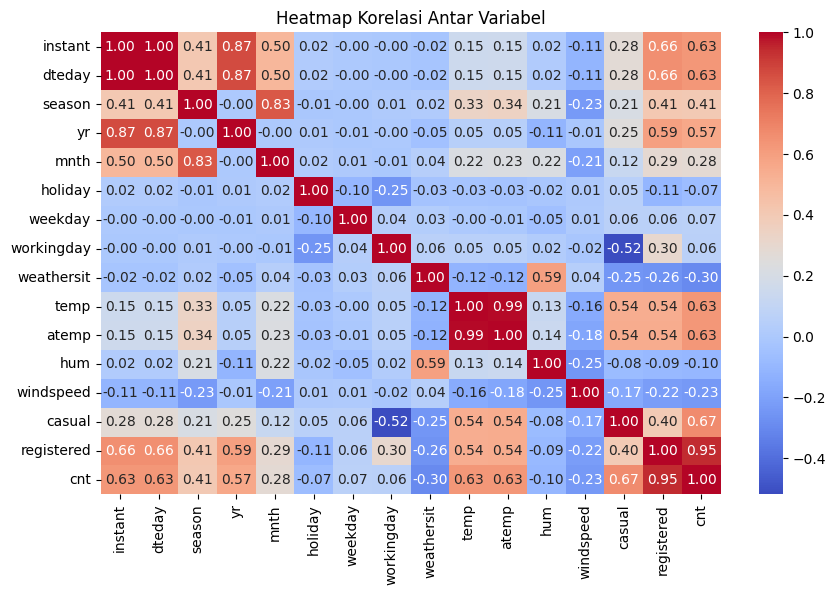

In [691]:
plt.figure(figsize=(10, 6))
sns.heatmap(day_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

**Insight:**
- Jumlah peminjaman sepeda cenderung meningkat dari tahun 2011 ke 2012, menunjukkan tren pertumbuhan pengguna layanan.
- Musim fall (3) memiliki jumlah peminjaman tertinggi dibandingkan musim lainnya. Musim spring (1) memiliki jumlah peminjaman terendah, kemungkinan karena cuaca yang kurang mendukung.
- Cuaca cerah atau berawan ringan (1) memiliki jumlah peminjaman tertinggi. Cuaca hujan deras atau badai (4) jarang terjadi dan memiliki jumlah peminjaman terendah.
- Suhu (temp) dan suhu terasa (atemp) memiliki korelasi tinggi dengan jumlah peminjaman sepeda, artinya semakin hangat cuaca, semakin banyak orang yang menyewa sepeda.
Kecepatan angin (windspeed) dan kelembaban (hum) memiliki korelasi negatif, menunjukkan bahwa angin kencang atau kelembaban tinggi cenderung mengurangi jumlah penyewa sepeda.

- Terlihat tren peningkatan jumlah peminjaman sepeda dari tahun 2011 ke 2012.
Akhir pekan dan hari kerja memiliki pola peminjaman yang berbeda, kemungkinan karena perbedaan pola perjalanan kerja dan rekreasi.

### Explore Data Hour_df

In [692]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
639,640,2011-01-29,1,0,1,22,0,6,0,1,0.16,0.1970,0.80,0.0896,4,28,32
7193,7194,2011-11-01,4,0,11,8,0,2,1,1,0.36,0.3333,0.71,0.2537,17,402,419
11491,11492,2012-04-29,2,1,4,0,0,0,0,3,0.36,0.3485,0.81,0.1343,0,36,36
4128,4129,2011-06-25,3,0,6,22,0,6,0,1,0.68,0.6364,0.47,0.1940,61,126,187
12105,12106,2012-05-24,2,1,5,14,0,4,1,1,0.74,0.6818,0.55,0.2239,72,180,252


In [693]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,5.0,17.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Statistik deskriptif**

In [694]:
descriptive_stats = hour_df.describe()
print("Statistik Deskriptif:")
display(descriptive_stats)

Statistik Deskriptif:


,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Distribusi jumlah peminjaman sepeda berdasarkan jam**

In [695]:
hourly_rentals = hour_df.groupby('hr')['cnt'].describe()
display(hourly_rentals)


<ipython-input-695-cb5b534161d8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_rentals = hour_df.groupby('hr')['cnt'].describe()


,count,mean,std,min,25%,50%,75%,max
hr,,,,,,,,
0,726.0,53.898072,42.307910,2.0,25.00,40.0,69.00,283.0
1,724.0,33.375691,33.538727,1.0,11.00,20.0,42.25,168.0
2,715.0,22.869930,26.578642,1.0,5.00,11.0,28.50,132.0
3,697.0,11.727403,13.239190,1.0,3.00,6.0,15.00,79.0
4,697.0,6.352941,4.143818,1.0,3.00,6.0,8.00,28.0
5,717.0,19.889819,13.200765,1.0,8.00,19.0,29.00,66.0
6,725.0,76.044138,55.084348,1.0,23.00,76.0,117.00,213.0
7,727.0,212.064649,161.441936,1.0,55.50,208.0,332.00,596.0
8,727.0,359.011004,235.189285,5.0,131.50,385.0,559.50,839.0


In [696]:
hourly_avg_rentals = hour_df.groupby('hr')['cnt'].mean().reset_index()
display(hourly_avg_rentals)

<ipython-input-696-cd8f38c072db>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_avg_rentals = hour_df.groupby('hr')['cnt'].mean().reset_index()


,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


**Distribusi jumlah peminjaman sepeda berdasarkan musim**

In [697]:
season_distribution = hour_df.groupby("season")["cnt"].describe()
print("\nDistribusi Peminjaman Berdasarkan Musim:")
display(season_distribution)



Distribusi Peminjaman Berdasarkan Musim:


<ipython-input-697-2b24aa9ffb11>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_distribution = hour_df.groupby("season")["cnt"].describe()


,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,4242.0,111.114569,119.224010,1.0,23.0,76.0,158.0,801.0
2,4409.0,208.344069,188.362473,1.0,46.0,165.0,311.0,957.0
3,4496.0,236.016237,197.711630,1.0,68.0,199.0,345.0,977.0
4,4232.0,198.868856,182.967972,1.0,46.0,155.5,295.0,967.0


**Distribusi jumlah peminjaman sepeda berdasarkan kondisi cuaca**

In [698]:
weather_distribution = hour_df.groupby("weathersit")["cnt"].describe()
print("\nDistribusi Peminjaman Berdasarkan Kondisi Cuaca:")
display(weather_distribution)


Distribusi Peminjaman Berdasarkan Kondisi Cuaca:


<ipython-input-698-36d980b56438>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_distribution = hour_df.groupby("weathersit")["cnt"].describe()


,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,11413.0,204.869272,189.487773,1.0,46.0,159.0,304.0,977.0
2,4544.0,175.165493,165.431589,1.0,40.0,133.0,257.0,957.0
3,1419.0,111.579281,133.781045,1.0,21.0,63.0,152.5,891.0
4,3.0,74.333333,77.925178,23.0,29.5,36.0,100.0,164.0


**Korelasi antara variabel numerik**

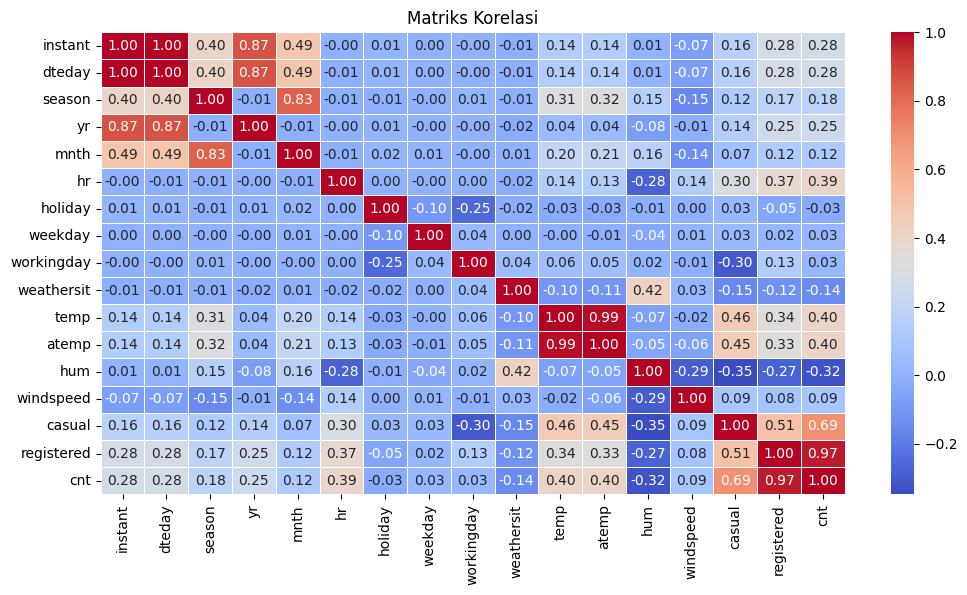

In [699]:
correlation_matrix = hour_df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

**Insight:**
- Jumlah peminjaman sepeda menunjukkan pola tertentu sepanjang hari.
Peminjaman meningkat pada jam sibuk (pagi dan sore) yang kemungkinan besar terkait dengan jam kerja dan pulang kerja.
- Peminjaman tertinggi terjadi pada musim gugur dan musim panas.
Musim dingin memiliki jumlah peminjaman yang lebih rendah, kemungkinan karena cuaca yang kurang mendukung.
- Peminjaman sepeda lebih tinggi pada kondisi cuaca cerah dan menurun saat hujan atau berkabut.
Cuaca ekstrem (hujan deras atau badai) menyebabkan jumlah peminjaman berkurang drastis.
- uhu (temp) memiliki korelasi positif dengan jumlah peminjaman, artinya semakin hangat, semakin banyak sepeda yang dipinjam.
Kecepatan angin (windspeed) dan kelembaban (hum) memiliki korelasi negatif, yang berarti semakin tinggi angin atau kelembaban, semakin sedikit peminjaman.
- Hari kerja didominasi oleh peminjaman oleh pengguna terdaftar (registered), terutama pada jam sibuk.
Akhir pekan lebih banyak digunakan oleh pengguna kasual (casual) dengan distribusi peminjaman yang lebih merata sepanjang hari.

### Explore Data day_df dan Hour_df

**Merge data**

In [700]:
hour_df = hour_df.drop(columns=['mnth', 'season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit'])

In [701]:
main_data_df = pd.merge(hour_df, day_df, on='dteday', suffixes=('', '_drop'))

In [702]:
main_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   hr               17379 non-null  category      
 3   temp             17379 non-null  float64       
 4   atemp            17379 non-null  float64       
 5   hum              17379 non-null  float64       
 6   windspeed        17379 non-null  float64       
 7   casual           17379 non-null  int64         
 8   registered       17379 non-null  int64         
 9   cnt              17379 non-null  int64         
 10  instant_drop     17379 non-null  int64         
 11  season           17379 non-null  category      
 12  yr               17379 non-null  category      
 13  mnth             17379 non-null  category      
 14  holiday          17379 non-null  categ

In [703]:
main_data_df.sample(5)

,instant,dteday,hr,temp,atemp,hum,windspeed,casual,registered,cnt,...,weekday,workingday,weathersit,temp_drop,atemp_drop,hum_drop,windspeed_drop,casual_drop,registered_drop,cnt_drop
13210,13211,2012-07-09,15,0.76,0.6818,0.45,0.2239,66,214,280,...,1,1,2,0.710833,0.654054,0.683333,0.180975,998,5571,6569
11789,11790,2012-05-11,10,0.52,0.5000,0.36,0.3284,69,141,210,...,5,1,1,0.533333,0.520833,0.360417,0.236937,1319,5711,7030
15819,15820,2012-10-26,8,0.54,0.5152,0.88,0.1343,20,714,734,...,5,1,2,0.545833,0.522750,0.807083,0.132467,1182,6262,7444
16501,16502,2012-11-25,7,0.22,0.2424,0.51,0.1045,2,19,21,...,0,0,1,0.245833,0.257583,0.468333,0.150500,309,2115,2424
3169,3170,2011-05-16,23,0.56,0.5303,0.88,0.0896,18,39,57,...,1,1,1,0.577500,0.550512,0.787917,0.126871,773,3185,3958


**Statistik deskriptif**

In [704]:
descriptive_stats = main_data_df.describe()
print("Statistik Deskriptif:")
display(descriptive_stats)

Statistik Deskriptif:


,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,instant_drop,temp_drop,atemp_drop,hum_drop,windspeed_drop,casual_drop,registered_drop,cnt_drop
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,367.172622,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
min,1.0000,2011-01-01 00:00:00,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2011-07-04 00:00:00,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,185.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,2012-01-02 00:00:00,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,367.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,2012-07-02 00:00:00,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,549.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,5017.0295,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,210.072051,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947


**Visualisasi jumlah peminjaman harian dan per jam**

In [705]:
trend_rentals = main_data_df[['dteday', 'cnt']].groupby('dteday').sum().reset_index()
display(trend_rentals)  # Menampilkan 10 baris pertama


,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


In [706]:
average_rentals = main_data_df[['cnt']].mean()
display(average_rentals)


,0
cnt,189.463088


**Distribusi peminjaman berdasarkan musim**

In [707]:
season_rental_summary = main_data_df.groupby('season')['cnt'].describe()
display(season_rental_summary)


<ipython-input-707-8bcc07d9f75c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_rental_summary = main_data_df.groupby('season')['cnt'].describe()


,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,4242.0,111.114569,119.224010,1.0,23.0,76.0,158.0,801.0
2,4409.0,208.344069,188.362473,1.0,46.0,165.0,311.0,957.0
3,4496.0,236.016237,197.711630,1.0,68.0,199.0,345.0,977.0
4,4232.0,198.868856,182.967972,1.0,46.0,155.5,295.0,967.0


In [708]:
total_rentals_by_season = main_data_df.groupby('season')['cnt'].sum().reset_index()
display(total_rentals_by_season)

<ipython-input-708-6decc830d656>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_rentals_by_season = main_data_df.groupby('season')['cnt'].sum().reset_index()


,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


**Korelasi antar variabel numerik**

In [709]:
correlation_matrix = main_data_df.corr()
display(correlation_matrix)


,instant,dteday,hr,temp,atemp,hum,windspeed,casual,registered,cnt,...,weekday,workingday,weathersit,temp_drop,atemp_drop,hum_drop,windspeed_drop,casual_drop,registered_drop,cnt_drop
instant,1.000000,0.999995,-0.004775,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379,...,0.001357,-0.003416,-0.025841,0.143514,0.145394,0.013548,-0.118361,0.274124,0.666838,0.635346
dteday,0.999995,1.000000,-0.006161,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753,...,0.001372,-0.003366,-0.025716,0.143615,0.145524,0.013874,-0.118285,0.274026,0.666666,0.635172
hr,-0.004775,-0.006161,1.000000,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071,...,-0.003498,0.002285,-0.000535,-0.007823,-0.007840,-0.001111,-0.000113,-0.005508,-0.008389,-0.008729
temp,0.136178,0.136074,0.137603,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772,...,-0.001795,0.055390,-0.113428,0.947491,0.939540,0.124365,-0.153093,0.511386,0.508241,0.592402
atemp,0.137615,0.137543,0.133750,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929,...,-0.008821,0.054667,-0.114225,0.937229,0.945161,0.136360,-0.177180,0.510784,0.511182,0.594557
hum,0.009577,0.010196,-0.276498,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911,...,-0.037158,0.015688,0.432977,0.096457,0.106022,0.734874,-0.189708,-0.052628,-0.060236,-0.067356
windspeed,-0.074505,-0.074645,0.137252,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234,...,0.011502,-0.011830,0.017788,-0.101965,-0.118299,-0.162909,0.631062,-0.104659,-0.134732,-0.145990
casual,0.158295,0.157821,0.301202,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564,...,0.032721,-0.300942,-0.140963,0.312517,0.312873,-0.041860,-0.094783,0.579286,0.222670,0.386582
registered,0.282046,0.281450,0.374141,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151,...,0.021578,0.134326,-0.106774,0.225692,0.227536,-0.034857,-0.089405,0.162269,0.422071,0.398120
cnt,0.278379,0.277753,0.394071,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000,...,0.026900,0.030284,-0.127413,0.273276,0.274911,-0.040465,-0.100367,0.292866,0.412720,0.437289


In [710]:
correlation_with_cnt = correlation_matrix["cnt"].sort_values(ascending=False)
display(correlation_with_cnt)


,cnt
cnt,1.000000
registered,0.972151
casual,0.694564
cnt_drop,0.437289
registered_drop,0.412720
temp,0.404772
atemp,0.400929
hr,0.394071
casual_drop,0.292866
instant,0.278379


**Insight**
- Tren peminjaman sepeda menunjukkan pola harian dan musiman yang konsisten.
- Peminjaman meningkat pada musim panas dan gugur, serta cenderung rendah di musim dingin.
- Terdapat korelasi positif antara temperatur dengan jumlah peminjaman sepeda.
- Hari kerja memiliki jumlah peminjaman yang lebih tinggi dibandingkan akhir pekan.
- Kecepatan angin yang tinggi dan kelembaban yang tinggi cenderung menurunkan jumlah peminjaman.

## Visualization & Explanatory Analysis

In [711]:
main_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   hr               17379 non-null  category      
 3   temp             17379 non-null  float64       
 4   atemp            17379 non-null  float64       
 5   hum              17379 non-null  float64       
 6   windspeed        17379 non-null  float64       
 7   casual           17379 non-null  int64         
 8   registered       17379 non-null  int64         
 9   cnt              17379 non-null  int64         
 10  instant_drop     17379 non-null  int64         
 11  season           17379 non-null  category      
 12  yr               17379 non-null  category      
 13  mnth             17379 non-null  category      
 14  holiday          17379 non-null  categ

In [712]:
main_data_df.sample(5)

,instant,dteday,hr,temp,atemp,hum,windspeed,casual,registered,cnt,...,weekday,workingday,weathersit,temp_drop,atemp_drop,hum_drop,windspeed_drop,casual_drop,registered_drop,cnt_drop
17362,17363,2012-12-31,7,0.16,0.1818,0.64,0.1343,2,83,85,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
5028,5029,2011-08-02,10,0.82,0.7273,0.36,0.2985,50,90,140,...,2,1,1,0.783333,0.707071,0.491250,0.205850,801,4044,4845
15672,15673,2012-10-20,5,0.40,0.4091,0.82,0.0000,6,7,13,...,6,0,1,0.484167,0.472842,0.572917,0.117537,2806,5284,8090
16313,16314,2012-11-17,11,0.38,0.3939,0.43,0.1940,80,343,423,...,6,0,1,0.325000,0.326383,0.545417,0.179729,1313,4316,5629
10477,10478,2012-03-17,16,0.64,0.6212,0.50,0.0000,367,318,685,...,6,0,2,0.514167,0.505046,0.755833,0.110704,3155,4681,7836


### Bagaimana pola peminjaman sepeda berdasarkan jam, hari, dan bulan?:

<ipython-input-713-d9ee4ce7c9bf>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=main_data_df, estimator='mean', ci=None)


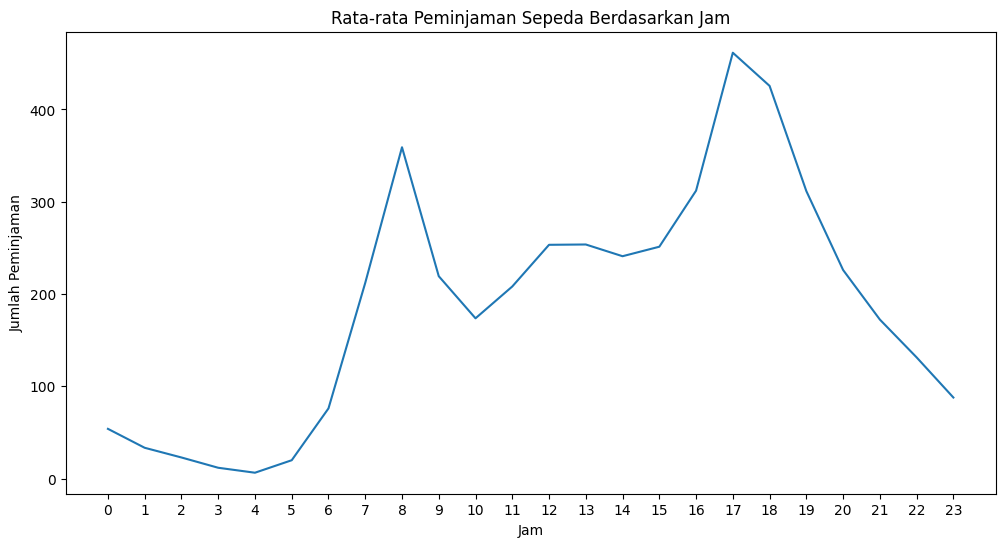

In [713]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=main_data_df, estimator='mean', ci=None)
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(range(0, 24))
plt.show()


<ipython-input-714-8687b4f94c68>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=main_data_df, estimator='mean', ci=None)


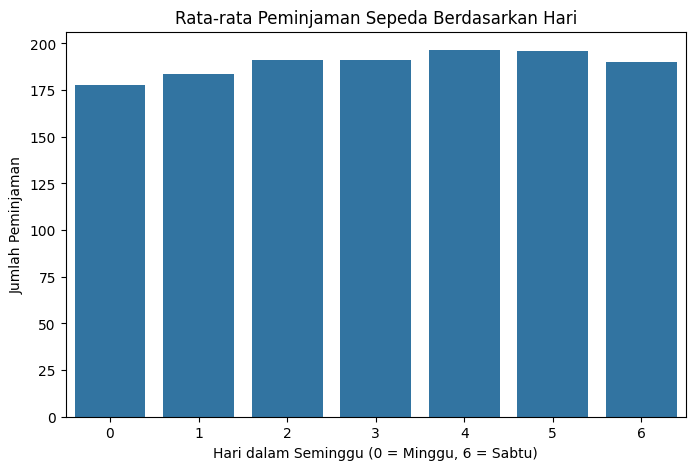

In [714]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weekday', y='cnt', data=main_data_df, estimator='mean', ci=None)
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Hari")
plt.xlabel("Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)")
plt.ylabel("Jumlah Peminjaman")
plt.show()

<ipython-input-715-6688d3218454>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=main_data_df, estimator='mean', ci=None)


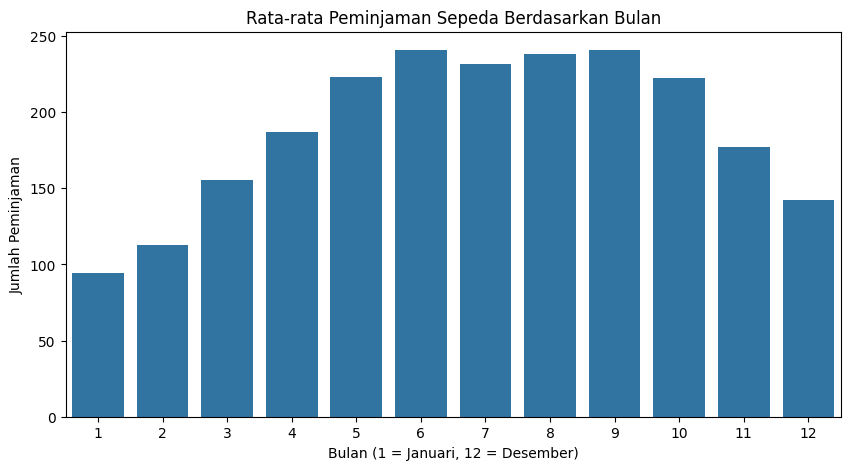

In [715]:
plt.figure(figsize=(10, 5))
sns.barplot(x='mnth', y='cnt', data=main_data_df, estimator='mean', ci=None)
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Bulan")
plt.xlabel("Bulan (1 = Januari, 12 = Desember)")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**
- Jam sibuk peminjaman terjadi di pagi (08:00) dan sore (17:00), bertepatan dengan jam kerja.
- Peminjaman lebih tinggi pada hari kerja, menunjukkan bahwa sepeda banyak digunakan untuk transportasi ke kantor atau sekolah.
- Peminjaman meningkat selama musim panas dan menurun selama musim dingin.

### Apakah terdapat tren kenaikan atau penurunan jumlah peminjaman dalam satu tahun?:

**Agregasi jumlah peminjaman sepeda per bulan**

In [716]:
monthly_trend = main_data_df.groupby('mnth')['cnt'].sum().reset_index()

<ipython-input-716-5860aa14d57b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trend = main_data_df.groupby('mnth')['cnt'].sum().reset_index()


**Visualisasi Line Chart**

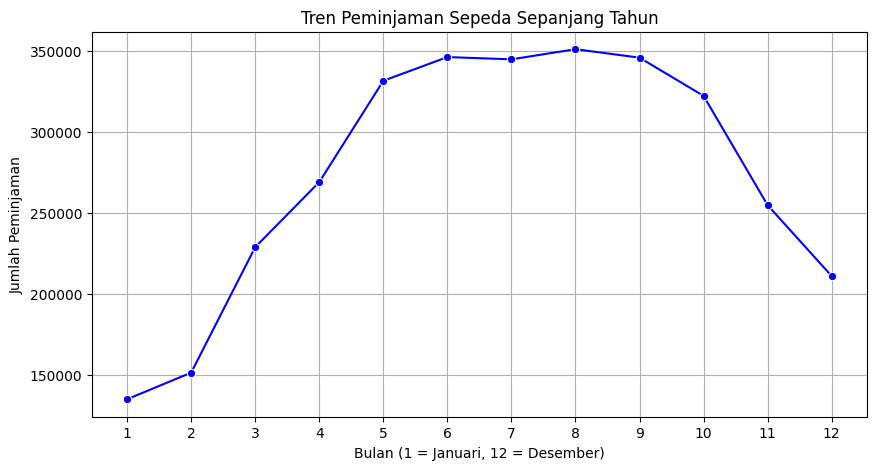

In [717]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='mnth', y='cnt', data=monthly_trend, marker='o', color='b')
plt.title('Tren Peminjaman Sepeda Sepanjang Tahun')
plt.xlabel('Bulan (1 = Januari, 12 = Desember)')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

**Visualisasi Bar Chart**

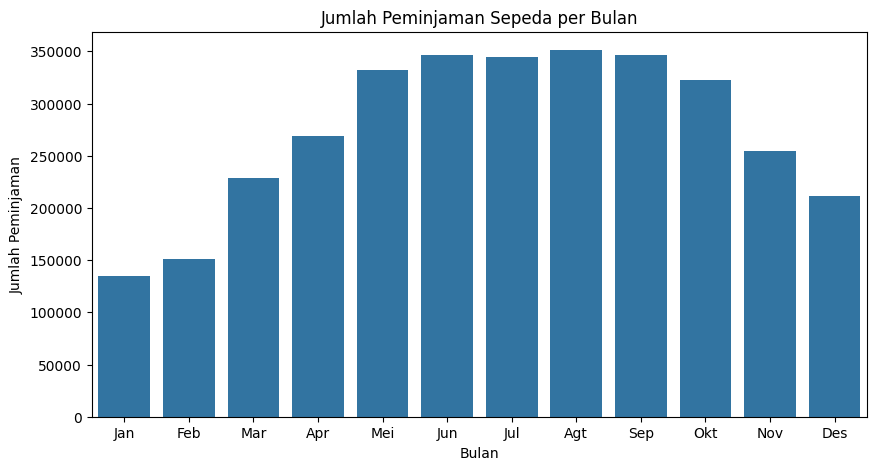

In [718]:
plt.figure(figsize=(10, 5))
sns.barplot(x='mnth', y='cnt', data=monthly_trend)
plt.title('Jumlah Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agt', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()

**Insight:**
- Hasil dari visualisasi ini akan menunjukkan apakah jumlah peminjaman meningkat, menurun, atau memiliki pola musiman dalam satu tahun. Jika tren naik secara keseluruhan, berarti semakin banyak orang menggunakan sepeda. Jika ada pola musiman, maka peminjaman lebih banyak terjadi pada bulan-bulan tertentu.

### RFM Analysis:

**Tentukan tanggal referensi sebagai tanggal terakhir dalam dataset**

In [719]:
reference_date = main_data_df['dteday'].max()

**1. Hitung Recency (R)**

In [720]:
recency_df = main_data_df.groupby('registered')['dteday'].max().reset_index()
recency_df['Recency'] = (reference_date - recency_df['dteday']).dt.days

**2. Hitung Frequency (F)**

In [721]:
frequency_df = main_data_df.groupby('registered')['dteday'].count().reset_index()
frequency_df.rename(columns={'dteday': 'Frequency'}, inplace=True)

**3. Hitung Monetary (M)**

In [722]:
monetary_df = main_data_df.groupby('registered')['cnt'].sum().reset_index()
monetary_df.rename(columns={'cnt': 'Monetary'}, inplace=True)

**Gabungkan semua metrik RFM**

In [723]:
rfm_df = recency_df.merge(frequency_df, on='registered').merge(monetary_df, on='registered')

**Visualisasi: Scatter Plot RFM**

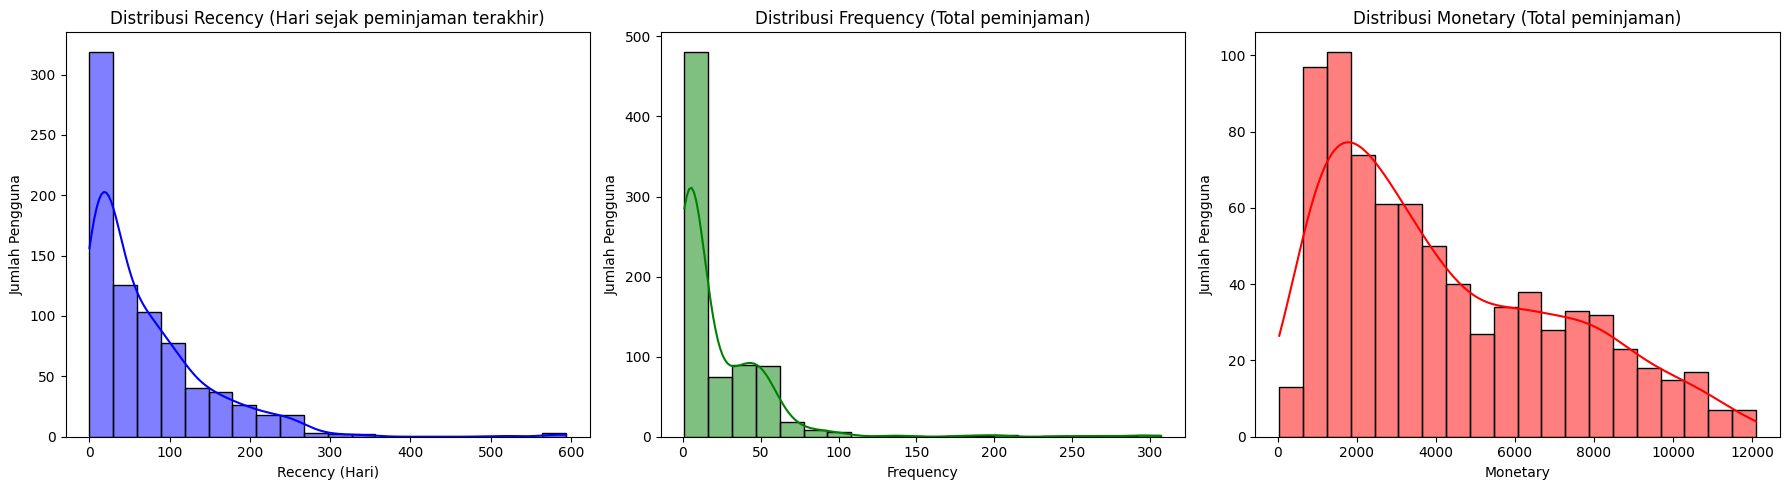

In [724]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm_df['Recency'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribusi Recency (Hari sejak peminjaman terakhir)')
axes[0].set_xlabel('Recency (Hari)')
axes[0].set_ylabel('Jumlah Pengguna')

sns.histplot(rfm_df['Frequency'], bins=20, kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribusi Frequency (Total peminjaman)')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Jumlah Pengguna')

sns.histplot(rfm_df['Monetary'], bins=20, kde=True, color='red', ax=axes[2])
axes[2].set_title('Distribusi Monetary (Total peminjaman)')
axes[2].set_xlabel('Monetary')
axes[2].set_ylabel('Jumlah Pengguna')

plt.tight_layout()
plt.show()


**Visualisasi: Heatmap RFM**

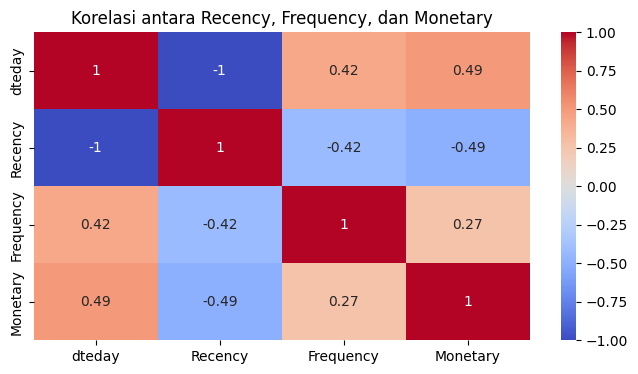

In [725]:
plt.figure(figsize=(8, 4))
sns.heatmap(rfm_df.drop(columns=['registered']).corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi antara Recency, Frequency, dan Monetary")
plt.show()

**Insight:**
- Recency : Pelanggan dengan nilai recency kecil (hari lebih sedikit) adalah yang paling aktif baru-baru ini.
Pelanggan dengan nilai recency besar mungkin sudah tidak aktif lagi.

- Frequency : Pelanggan yang memiliki frequency tinggi berarti sering menyewa sepeda.
Jika frequency rendah, pelanggan jarang menggunakan layanan ini.
- Monetary: Monetary tinggi menunjukkan pelanggan sering menyewa sepeda dalam jumlah banyak. Jika monetary rendah, pelanggan mungkin hanya sesekali menggunakan layanan ini.

- Korelasi antara RFM : Jika ada korelasi negatif antara Recency dan Frequency/Monetary, artinya semakin lama pelanggan tidak aktif, semakin rendah juga frekuensi dan jumlah peminjaman mereka.
Jika Frequency dan Monetary memiliki korelasi positif, berarti pelanggan yang sering meminjam juga menyewa dalam jumlah yang lebih banyak.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2